In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Create data

In [32]:
np.random.seed(0)
xs1= np.random.randn(500)*100+350
ys1 = 1.5*xs1+0.5+np.random.randn(500)*50
xs2 = np.random.randn(200)*150 + 700
ys2 = 0.5*xs2+500+np.random.randn(200)*50
xs3 = np.random.randn(200)*200 + 1250
ys3 = 0.2*xs3+800+np.random.randn(200)*50
xs = np.concatenate((xs1,xs2,xs3))
ys = np.concatenate((ys1,ys2,ys3))

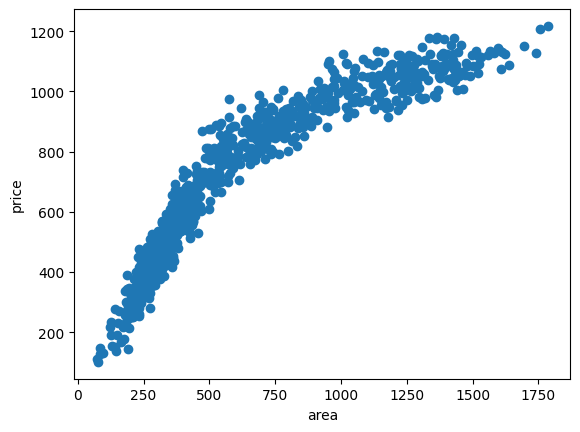

In [33]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(xs,ys)
plt.show()

In [34]:
pd.DataFrame({'area':xs,'price':ys}).to_csv('data/quadratic_rents.csv',index=False)
plt.show()

---

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as utils

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
np.random.seed(123)
torch.manual_seed(123)

## Load & preprocess data

In [37]:
# load
df = pd.read_csv('data/quadratic_rents.csv')
df.head()

,area,price
0,526.405235,809.244473
1,390.015721,583.811467
2,447.873798,727.128040
3,574.089320,849.923190
4,536.755799,788.261166


In [38]:
# numpy array data
xs = np.array(df['area'])
ys = np.array(df['price'])
# normalize
xs_n = (xs-np.mean(xs))/np.std(xs)
ys_n = (ys-np.mean(ys))/np.std(ys)
# ordex with respect to xs
idx = np.argsort(xs_n)
xs_o = xs_n[idx]
ys_o = ys_n[idx]
# tensor
xs_t = torch.tensor(xs_o, dtype=torch.float32).reshape(-1,1)
ys_t = torch.tensor(ys_o, dtype=torch.float32).reshape(-1,1)
# dataset
dataset = utils.TensorDataset(xs_t, ys_t)
dataset_loader = utils.DataLoader(dataset, batch_size=100, shuffle=True)

## Model 1: Quadratic

In [39]:
class MyModel(nn.Module):
    def __init__(self) -> None:
        super(MyModel, self).__init__()
        self.a = nn.Parameter(torch.randn(1))
        self.b = nn.Parameter(torch.randn(1))
        self.c = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.a*x**2+self.b*x+self.c

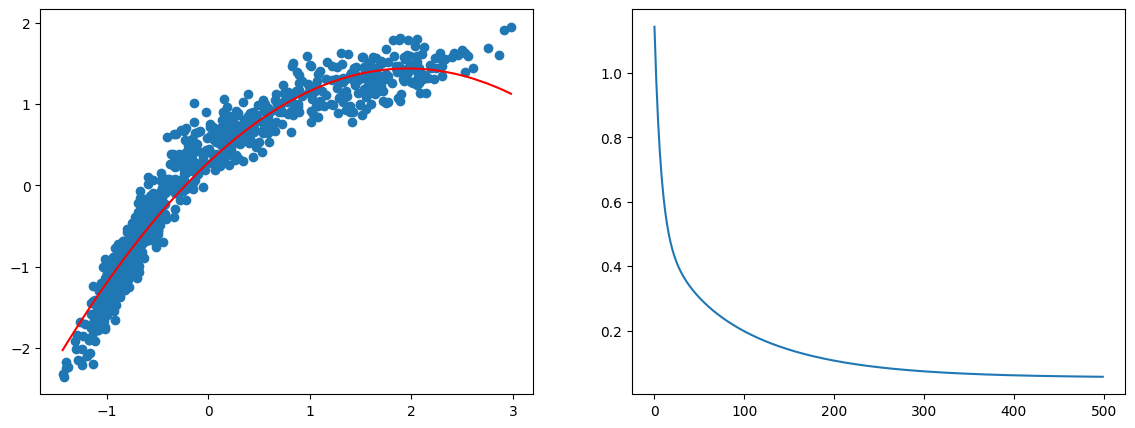

In [40]:
my_model = MyModel()
optimizer = optim.SGD(my_model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

n_epochs = 500
losses = []
for epoch in range(1,n_epochs+1):
    running_loss = 0
    optimizer.zero_grad()
    y_pred = my_model(xs_t)
    loss = loss_fn(y_pred,ys_t)
    loss.backward()
    running_loss += loss.item()
    losses.append(running_loss)
    optimizer.step()

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(xs_n,ys_n)
plt.plot(xs_t,my_model(xs_t).detach(), color='red')
plt.subplot(1,2,2)
plt.plot(losses)
plt.show()

## Model 2: 1-3-1 neural network (relu activated)

In [41]:
class MyModel(nn.Module):
    def __init__(self) -> None:
        super(MyModel, self).__init__()
        self.layer1 = nn.Linear(1, 3)
        self.layer2 = nn.Linear(3, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        l = self.layer1(x)
        l_act = self.relu(l)
        y = self.layer2(l_act)
        return y

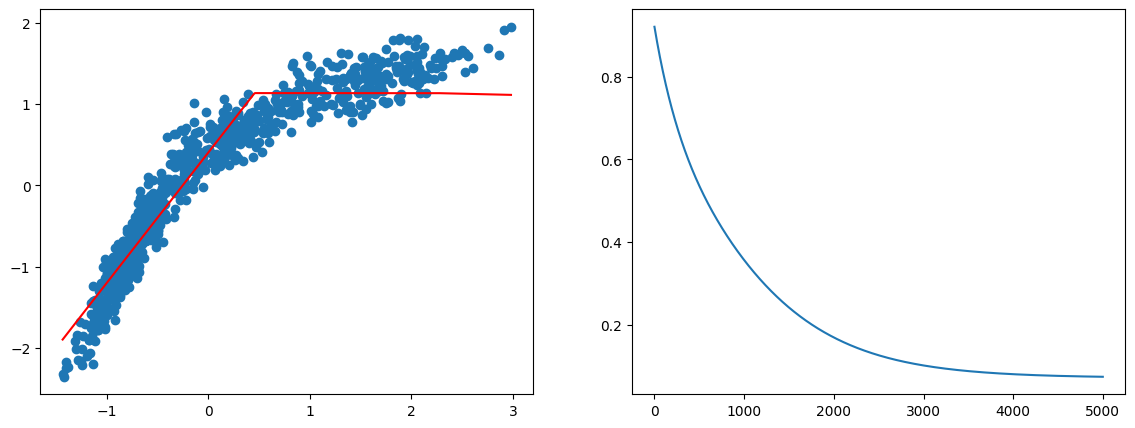

In [42]:
my_model = MyModel()
optimizer = optim.SGD(my_model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

n_epochs = 5000
losses = []
for epoch in range(1,n_epochs+1):
    running_loss = 0
    optimizer.zero_grad()
    y_pred = my_model(xs_t)
    loss = loss_fn(y_pred,ys_t)
    loss.backward()
    running_loss += loss.item()
    losses.append(running_loss)
    optimizer.step()

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(xs_n,ys_n)
plt.plot(xs_t,my_model(xs_t).detach(), color='red')
plt.subplot(1,2,2)
plt.plot(losses)
plt.show()

## Model 3: 1-1000-1 neural network (relu activated)

In [43]:
class MyModel(nn.Module):
    def __init__(self) -> None:
        super(MyModel, self).__init__()
        self.layer1 = nn.Linear(1, 100)
        self.layer2 = nn.Linear(100, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        l = self.layer1(x)
        l_act = self.relu(l)
        y = self.layer2(l_act)
        return y

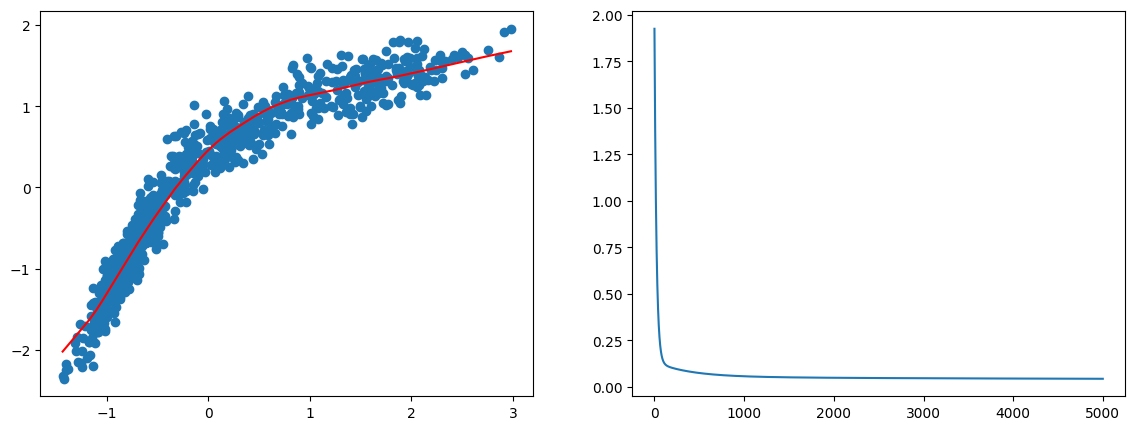

In [44]:
my_model = MyModel()
optimizer = optim.SGD(my_model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

n_epochs = 5000
losses = []
for epoch in range(1,n_epochs+1):
    running_loss = 0
    optimizer.zero_grad()
    y_pred = my_model(xs_t)
    loss = loss_fn(y_pred,ys_t)
    loss.backward()
    running_loss += loss.item()
    losses.append(running_loss)
    optimizer.step()

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(xs_n,ys_n)
plt.plot(xs_t,my_model(xs_t).detach(), color='red')
plt.subplot(1,2,2)
plt.plot(losses)
plt.show()